In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)
print("Hello world")

Hello world


### Below command shows all the data columns along with the first 5 rows. It contains details of resources within expleo. 

In [68]:
raw_df = pd.read_excel("C:\\Users\\ADMIN\\Desktop\\EDA.xlsx")
raw_df.head(5)

,Emp Code,CBU,GCM Grade,Designation,NBD,Alloc Dt,Rel Dt,Actual NBD,Aging,Primary Skill,Digital Services,Resource Updated Status,Shared,Remarks for Bench,Remarks from call,Reporting Manager,Follow up,Expected Date,RAK Updates/Reject,Shared Status,Reject Status,OI Number,Reporting Mgr,Reporting Mgr Code,Remarks,Client Name,End Client,Service Name,Base Location,Region2,CBU Mapping,Job Family,LWD,Vertical,Sub Vertical
0,ES6734,CBU-DET,GG1.2,Software Engineer,91.0,2023-10-07,2024-03-29,174,More Than 120,"Java ,Spring boot ,Spring,\nRepresentational S...",Development:Java,Resigned,TI Clean - Reject,NaN,TI clean reject,Tejas Nityanand,Follow up with HR,NaN,NaN,NaN,Reject in TI Clean,NaN,Tejas Nityanand,EI54192,Available. New Joinee. iCIMS ID: 25724. Mega W...,NaN,Bench,NaN,Mumbai,Bench,CBU-DET,Digital,NaN,Digital,Digital-Development
1,ES6805,CBU-DET,GG2.2,Associate Lead Software Engineer,5.0,2024-03-02,2024-03-29,27,0-30,"IAM/PAM (ARCON, CyberArk), Ethical hacking",Cybersecurity,Resigned,"Potential for Schinder,TVS",NaN,Resigned,Sandeep Kumar Nigam,NaN,NaN,NaN,NaN,NaN,APDETSEIN06301-N,Sandeep Kumar Nigam,ES6413,MTD Schneider,NaN,Bench,NaN,Pune,NaN,CBU-DET,Digital,NaN,Digital,Digital-Cyber Security
2,ES6025,CBU-DET,GG2.1,Senior Software Engineer,31.0,2024-01-26,2024-03-29,63,60-90,BI Developer,Digital-Data Engineering,Available,Shared for Volvo,Need updates,Need updates,Milind Dhobe,NaN,NaN,NaN,Interview Scheduled,Reject in RAK,NaN,Milind Dhobe,TG3936,Available - Released from QTP Initiatives on 6...,NaN,Bench,NaN,Pune,Bench,CBU-DET,Digital,NaN,Banking,Digital-Data Engineering
3,ES6616,CBU-DET,GG3.1,Lead Software Engineer,71.0,2024-03-07,2024-03-29,22,0-30,DevOps Tools\n(1) Azure DevOps\n(2) Github Act...,Digital-Devops,Available,Sharing to Schneider and Cariad,Requested GitHub Foundation Certificate and sh...,Requested GitHub Foundation Certificate and he...,Sanjay Panditrao Pachpande,NaN,NaN,Rejected RAK,NaN,NaN,NaN,Sanjay Panditrao Pachpande,ES6470,Available - Released from CBJ(3 Nov 23),NaN,Bench,NaN,Pune,Bench,CBU-DET,Digital,NaN,Digital,Digital-Devops
4,ES6825,CBU-DET,GG4.1,Technical Architect,10.0,2024-03-03,2024-03-29,26,0-30,"DevSecOps, AWS Cloud, Azure Cloud. Solution Ar...",Digital-Devops,Mapped,MTD TVS Motors,"Awaiting PO to be released, Requested GitHub F...","Awaiting PO to be released, Requested GitHub F...",Ragavendira R,NaN,2024-03-01 00:00:00,NaN,NaN,NaN,APDETTVSM06092-E1,Ragavendira R,TG2944,MTD - TVS Motors,NaN,Bench,NaN,BengaluruESL,NaN,CBU-DET,Digital,NaN,Digital,Digital-Development


### Initially the column names contains ' ' which is not considered good practice, below code replaces empty space character with '_'

In [69]:
print(raw_df.columns)
raw_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
raw_df = raw_df.rename(columns={'Remarks_from_call':'Remarks_From_Call','Follow_up':'Follow_Up'})
print(raw_df.columns)

Index(['Emp Code', 'CBU', 'GCM Grade', 'Designation', 'NBD', 'Alloc Dt',
       'Rel Dt', 'Actual NBD', 'Aging', 'Primary Skill', 'Digital Services',
       'Resource Updated Status', 'Shared', 'Remarks for Bench',
       'Remarks from call', 'Reporting Manager', 'Follow up', 'Expected Date',
       'RAK Updates/Reject', 'Shared Status', 'Reject Status', 'OI Number',
       'Reporting Mgr', 'Reporting Mgr Code', 'Remarks', 'Client Name',
       'End Client', 'Service Name', 'Base Location', 'Region2', 'CBU Mapping',
       'Job Family', 'LWD', 'Vertical', 'Sub Vertical'],
      dtype='object')
Index(['Emp_Code', 'CBU', 'GCM_Grade', 'Designation', 'NBD', 'Alloc_Dt',
       'Rel_Dt', 'Actual_NBD', 'Aging', 'Primary_Skill', 'Digital_Services',
       'Resource_Updated_Status', 'Shared', 'Remarks_for_Bench',
       'Remarks_From_Call', 'Reporting_Manager', 'Follow_Up', 'Expected_Date',
       'RAK_Updates/Reject', 'Shared_Status', 'Reject_Status', 'OI_Number',
       'Reporting_Mgr', 'Repo

### As the data only contains 4 numerical columns 2 being datetime, the descibe command only has 4 columns

In [70]:
raw_df.describe()

,NBD,Alloc_Dt,Rel_Dt,Actual_NBD
count,77.000000,94,94,94.000000
mean,29.194805,2024-01-25 15:34:28.085106432,2024-03-29 00:00:00,63.351064
min,4.000000,2023-08-21 00:00:00,2024-03-29 00:00:00,8.000000
25%,6.000000,2024-01-03 18:00:00,2024-03-29 00:00:00,28.000000
50%,11.000000,2024-02-08 00:00:00,2024-03-29 00:00:00,50.000000
75%,31.000000,2024-03-01 00:00:00,2024-03-29 00:00:00,85.250000
max,178.000000,2024-03-21 00:00:00,2024-03-29 00:00:00,221.000000
std,34.513551,NaN,NaN,49.954325


### Below shows a plotted histogram and Bell curve for NBD values. It has a mean of 29.19 and the curve shows data is Right-skewed

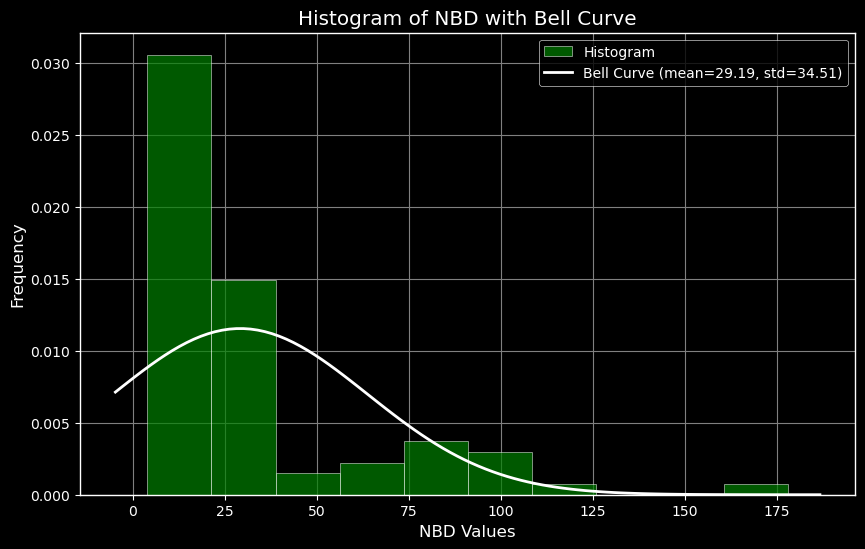

In [71]:

# Set the dark background style
plt.style.use('dark_background')

# Assuming raw_df is already loaded with the data
nbd_column = raw_df['NBD']  # Extract the 'NBD' column

# Calculate mean and standard deviation
mean = nbd_column.mean()
std_dev = nbd_column.std()

# Plot the histogram
plt.figure(figsize=(10, 6))
hst = plt.hist(nbd_column, bins=10, color='green', edgecolor='white', density=True, alpha=0.7, label='Histogram')  # Set density=True for normalized histogram

# Create bell curve (normal distribution curve)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'white', linewidth=2, label=f'Bell Curve (mean={mean:.2f}, std={std_dev:.2f})')  # Set color to white for the bell curve

# Customize the plot
plt.title('Histogram of NBD with Bell Curve', color='white')  # Set title color to white
plt.xlabel('NBD Values', color='white')  # Set x-label color to white
plt.ylabel('Frequency', color='white')  # Set y-label color to white
plt.grid(True, color='gray')  # Set grid color to gray
plt.legend(facecolor='black', edgecolor='white', loc='upper right')  # Set legend facecolor to black and edgecolor to white

# Show the plot
plt.show()


### Dataframe information command reveals there are only 4 numeric data columns in the dataset rest are all categorical types

In [72]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Emp_Code                 94 non-null     object        
 1   CBU                      94 non-null     object        
 2   GCM_Grade                94 non-null     object        
 3   Designation              94 non-null     object        
 4   NBD                      77 non-null     float64       
 5   Alloc_Dt                 94 non-null     datetime64[ns]
 6   Rel_Dt                   94 non-null     datetime64[ns]
 7   Actual_NBD               94 non-null     int64         
 8   Aging                    94 non-null     object        
 9   Primary_Skill            63 non-null     object        
 10  Digital_Services         94 non-null     object        
 11  Resource_Updated_Status  94 non-null     object        
 12  Shared                   58 non-null  

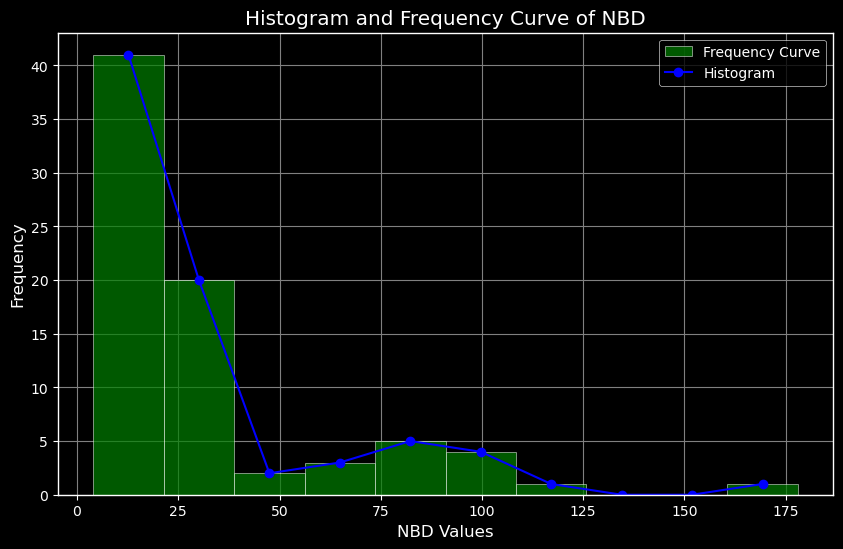

In [73]:


# Set the dark background style
plt.style.use('dark_background')

# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(nbd_column, bins=10, color='green', edgecolor='white', density=False, alpha=0.7, label='Histogram')  # Set density=False to display frequency

# Calculate the midpoint of each bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Plot the frequency curve
plt.plot(bin_centers, n, color='blue', marker='o', linestyle='-')

# Customize the plot
plt.title('Histogram and Frequency Curve of NBD', color='white')
plt.xlabel('NBD Values', color='white')
plt.ylabel('Frequency', color='white')
plt.grid(True, color='gray')
plt.legend(['Frequency Curve', 'Histogram'], facecolor='black', edgecolor='white', loc='upper right')

# Show the plot
plt.show()


### Data contains a lot of missing values, and the count for missing values in each column is given below 

In [74]:
null_counts = raw_df.isnull().sum()
non_zero_null_counts = null_counts[null_counts > 0]
print(non_zero_null_counts)

NBD                   17
Primary_Skill         31
Shared                36
Remarks_for_Bench     57
Remarks_From_Call     31
Reporting_Manager     12
Follow_Up             90
Expected_Date         83
RAK_Updates/Reject    84
Shared_Status         76
Reject_Status         77
OI_Number             84
Reporting_Mgr         12
Reporting_Mgr_Code    31
Remarks               31
Client_Name           76
End_Client            32
Service_Name          85
Base_Location         31
Region2               45
CBU_Mapping           31
Job_Family            42
LWD                   81
Vertical              31
Sub_Vertical          31
dtype: int64


### Data table contains a majority of entries for Software Engineer followed by Senior Software Engineer

In [75]:
raw_df['Designation'].value_counts()

Designation
Software Engineer                   28
Senior Software Engineer            23
Lead Software Engineer              12
Associate Software Engineer         12
Associate Lead Software Engineer     8
Associate Technical Architect        4
Technical Architect                  1
Associate Project Manager            1
Associate - IT Services (ITES)       1
Solution Architect                   1
Senior Solution Architect            1
Project Manager                      1
Lead Business Analyst                1
Name: count, dtype: int64

### A total of 7 resources are working on projects currently

In [76]:
# raw_df[['GCM_Grade','Designation','Reporting_Manager','End_Client']].sort_values(by='Reporting_Manager').dropna()
filtered_df = raw_df[['GCM_Grade', 'Designation', 'Reporting_Manager', 'End_Client']].sort_values(by='Reporting_Manager')
# filtered_df[filtered_df['End_Client'] != 'Bench'].dropna()
filtered_df[(filtered_df['End_Client'] != 'Bench') & (filtered_df['End_Client'] != 'Unassigned') & (filtered_df['End_Client'] != 'Serving Notice')].dropna()

,GCM_Grade,Designation,Reporting_Manager,End_Client
14,GG1.2,Associate - IT Services (ITES),Aravind Gnanabaskaran,GEMS Education
22,GG3.1,Lead Software Engineer,Karthik Ramiah,Al Rajhi
48,GG2.2,Associate Lead Software Engineer,Karthik Ramiah,Export Credit Guarantee Corporate Limited
37,GG2.1,Senior Software Engineer,Rajesh Babu R,TVS credit Services Limited
27,GG2.1,Senior Software Engineer,Rohit Sinha,Expleo Solutions Limited
7,GG3.1,Lead Software Engineer,Rohit Sinha,Expleo Solutions Limited
47,GG3.1,Lead Software Engineer,Sahela Siddiqi Qutubuddin,TI CLEAN MOBILITY PRIVATE LIMITED


### Shows designation count of resources on bench or unassigned

In [77]:
# raw_df[raw_df['End_Client'] == 'Bench'][['GCM_Grade', 'Designation', 'Reporting_Manager', 'End_Client']].sort_values(by='Designation',ascending=False)
bench_count_df = pd.DataFrame()
bench_count_df = raw_df[raw_df['End_Client'].isin(['Bench', 'Unassigned'])][['GCM_Grade', 'Designation', 'Reporting_Manager', 'End_Client']].sort_values(by='Designation', ascending=False)
bench_count_df.groupby(['Designation', 'End_Client']).size().reset_index(name='Count').sort_values('Designation',ascending=False)


# raw_df.groupby(['Reporting_Manager', 'Sub_Vertical']).size().reset_index(name='Count').sort_values('Sub_Vertical',ascending=False)
# print(filtered_df[['Designation', 'End Client']]) 43 on bench

,Designation,End_Client,Count
12,Technical Architect,Bench,1
11,Solution Architect,Bench,1
9,Software Engineer,Bench,18
10,Software Engineer,Unassigned,3
7,Senior Software Engineer,Bench,14
8,Senior Software Engineer,Unassigned,1
5,Lead Software Engineer,Bench,3
6,Lead Software Engineer,Unassigned,4
4,Associate Technical Architect,Bench,1
3,Associate Software Engineer,Bench,1


### Zero number of duplicate rows in the dataset

In [78]:
raw_df.loc[raw_df.duplicated()]

,Emp_Code,CBU,GCM_Grade,Designation,NBD,Alloc_Dt,Rel_Dt,Actual_NBD,Aging,Primary_Skill,Digital_Services,Resource_Updated_Status,Shared,Remarks_for_Bench,Remarks_From_Call,Reporting_Manager,Follow_Up,Expected_Date,RAK_Updates/Reject,Shared_Status,Reject_Status,OI_Number,Reporting_Mgr,Reporting_Mgr_Code,Remarks,Client_Name,End_Client,Service_Name,Base_Location,Region2,CBU_Mapping,Job_Family,LWD,Vertical,Sub_Vertical


In [79]:
raw_df['End_Client'].mode()[0]

'Bench'

In [80]:
# Initialize an empty DataFrame to store the statistics

statistics_df = pd.DataFrame(index=['Mean', 'Median', 'Mode'])

# Calculate mean, median, and mode for each column
for column in raw_df.columns:
    if raw_df[column].dtype in ['int64', 'float64']:
        mean_value = raw_df[column].mean()
        median_value = raw_df[column].median()
        # Convert the entire column to string and calculate mode
        mode_value = raw_df[column].astype(str).replace('nan', '').dropna().mode()[0]  # Replace 'NaN' with empty string and calculate mode
        statistics_df[column] = [mean_value, median_value, mode_value]
    elif raw_df[column].dtype == 'object':
        # Convert the entire column to string, replace 'NaN' with empty string, and calculate mode
        mode_value = raw_df[column].astype(str).replace('nan', '').dropna().mode()[0]  # Replace 'NaN' with empty string and calculate mode
        statistics_df[column] = ['', '', mode_value]

# Display the statistics DataFrame
statistics_df

,Emp_Code,CBU,GCM_Grade,Designation,NBD,Actual_NBD,Aging,Primary_Skill,Digital_Services,Resource_Updated_Status,Shared,Remarks_for_Bench,Remarks_From_Call,Reporting_Manager,Follow_Up,Expected_Date,RAK_Updates/Reject,Shared_Status,Reject_Status,OI_Number,Reporting_Mgr,Reporting_Mgr_Code,Remarks,Client_Name,End_Client,Service_Name,Base_Location,Region2,CBU_Mapping,Job_Family,LWD,Vertical,Sub_Vertical
Mean,,,,,29.194805,63.351064,,,,,,,,,,,,,,,,,,,,,,,,,,,
Median,,,,,11.0,50.0,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mode,EI54165,CBU-DET,GG1.2,Software Engineer,,28,0-30,,Cybersecurity,Available,,,,Tejas Nityanand,,,,,,,Tejas Nityanand,,,,Bench,,,,CBU-DET,Digital,,Digital,


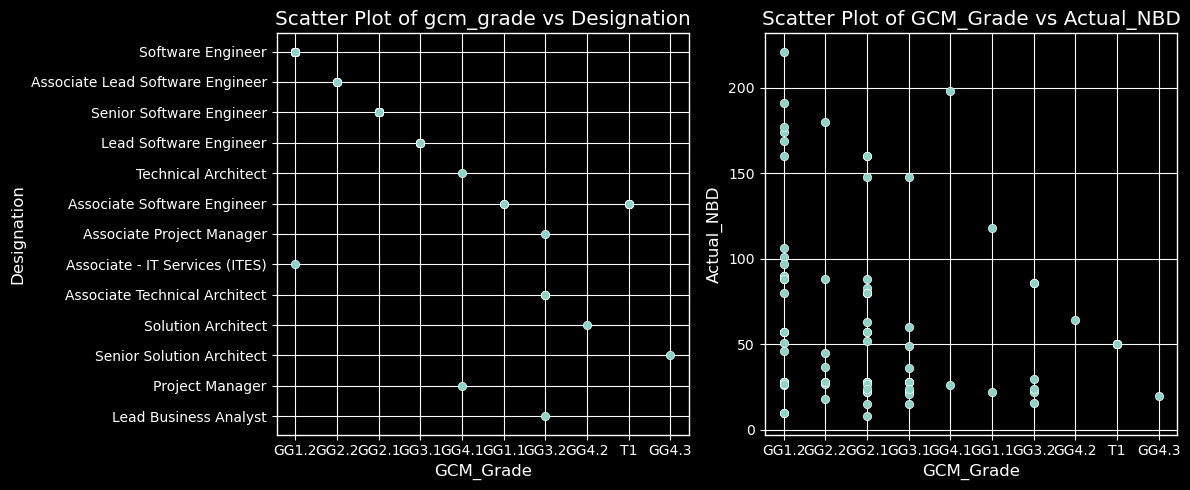

In [81]:
plt.figure(figsize=(12, 5))

# Scatter plot between gcm_grade and designation
plt.subplot(1, 2, 1)
sns.scatterplot(data=raw_df, x='GCM_Grade', y='Designation')
plt.title('Scatter Plot of gcm_grade vs Designation')

# Scatter plot between gcm_grade and actual_nbd
plt.subplot(1, 2, 2)
sns.scatterplot(data=raw_df, x='GCM_Grade', y='Actual_NBD')
plt.title('Scatter Plot of GCM_Grade vs Actual_NBD')

plt.tight_layout()
plt.show()


### Scatter plot shows GCM grade is related with designation and NBD

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8364\4244208744.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


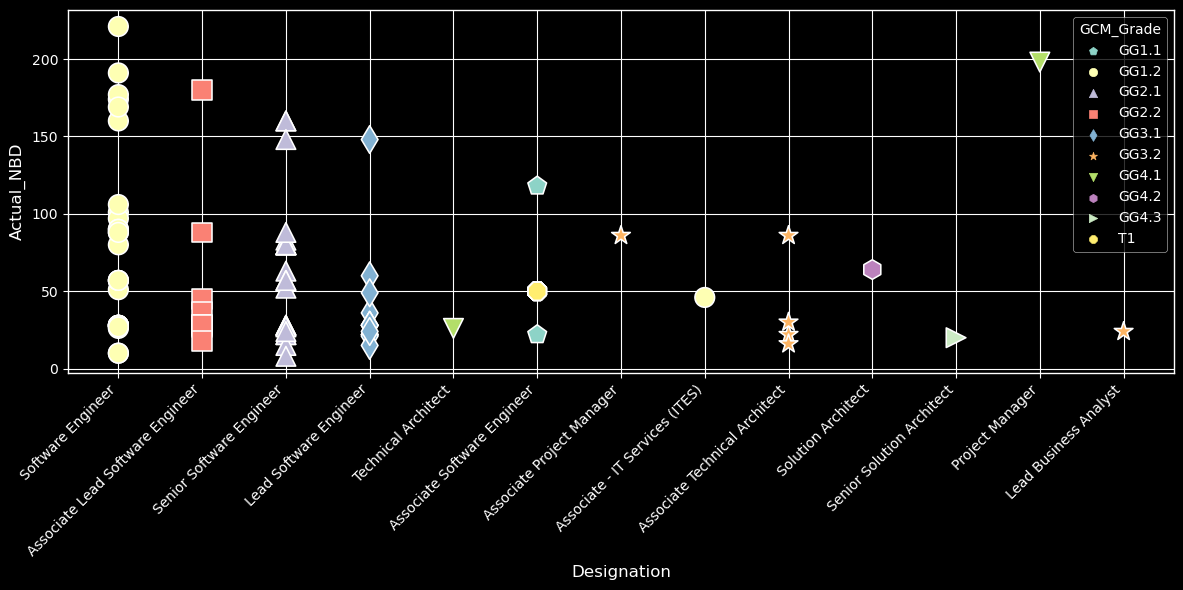

In [82]:
# Define 10 marker shapes
markers = ['o', 's', '^', 'd', 'v', 'p', '*', 'h', '8', '>']

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Designation',
                     y='Actual_NBD',
                     hue='GCM_Grade',  # Use GCM_Grade for hue
                     style='GCM_Grade',  # Use GCM_Grade for marker style
                     hue_order=sorted(raw_df['GCM_Grade'].unique()),  # Sort GCM_Grade for hue
                     markers=markers,  # Define 10 marker shapes
                     s=200,
                     data=raw_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Heatmap shows 1 to 1 relationship between columns 'Reporting manager' and 'Reporting Mgr', this shows that both columns contain the same data

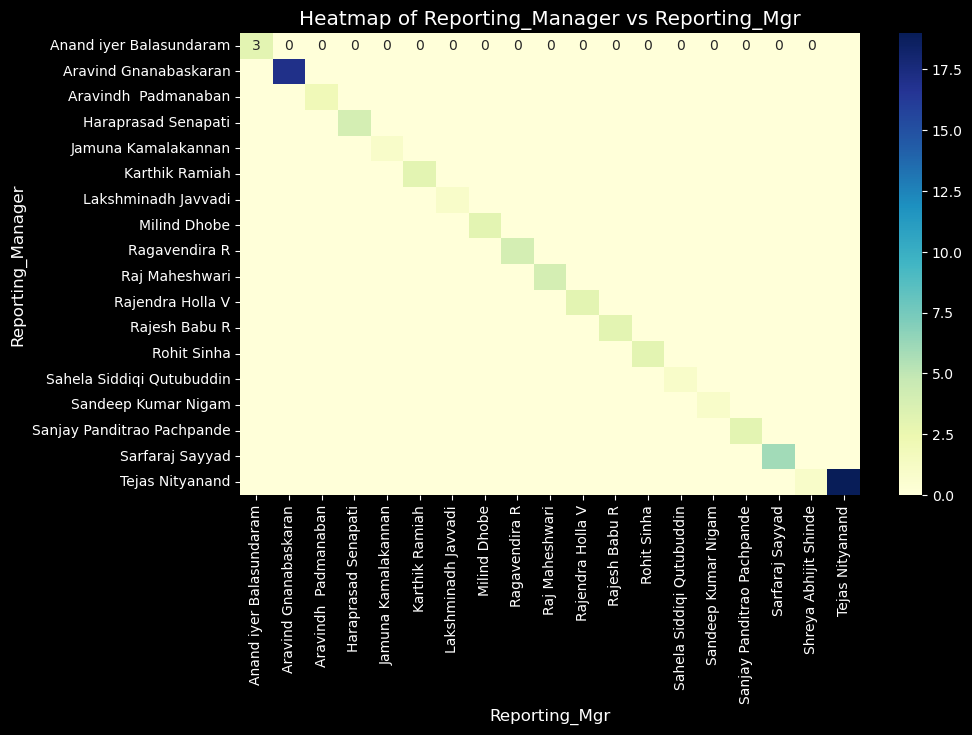

In [83]:
# Create a contingency table
contingency_table = pd.crosstab(raw_df['Reporting_Manager'], raw_df['Reporting_Mgr'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Reporting_Manager vs Reporting_Mgr')
plt.xlabel('Reporting_Mgr')
plt.ylabel('Reporting_Manager')
plt.show()


### Shows Digital services count for all the resources, majority of them being in cyber security

In [84]:
raw_df['Digital_Services'].value_counts()

Digital_Services
Cybersecurity                  21
Development:Java               20
Digital-Devops                 11
Development: Others            10
Development: NodeJS             5
Development : Python            4
Development:Data                3
Development (Mobile/Android     3
Development:Front end           3
Development RPA                 3
Digital-Data Engineering        3
Development:Javascript          2
Development:DOTNET              2
Development:React               1
Development:Python              1
Development:Mobile              1
Development:Angular             1
Name: count, dtype: int64

### As reporting manager and reporting mgr have a 1 to 1 correlation this code shows discrepancy in data as values for both columns is different

In [85]:

diff_df = raw_df[raw_df['Reporting_Manager'] != raw_df['Reporting_Mgr']][['Reporting_Manager', 'Reporting_Mgr']]

diff_df.dropna()



,Reporting_Manager,Reporting_Mgr
63,Tejas Nityanand,Shreya Abhijit Shinde


### Shows the actual % of NBD w.r.t Actual NBD
### Assuming NBD stands for No. of Business Days employee has worked from office, there is positive correlation between percentage and end client stating that bench resources work more from office
### Also points out some discrepencies in data where percentage cannot be greater than 100

In [86]:
raw_df['Percentage_of_NBD_wrt_Actual_NBD'] = (raw_df['NBD'] / raw_df['Actual_NBD']) * 100

# Display the updated DataFrame
raw_df[['Designation','NBD','Actual_NBD','Percentage_of_NBD_wrt_Actual_NBD','End_Client']].dropna().sort_values(by='Percentage_of_NBD_wrt_Actual_NBD')

,Designation,NBD,Actual_NBD,Percentage_of_NBD_wrt_Actual_NBD,End_Client
10,Software Engineer,4.0,51,7.843137,Bench
27,Senior Software Engineer,5.0,52,9.615385,Expleo Solutions Limited
14,Associate - IT Services (ITES),5.0,46,10.869565,GEMS Education
48,Associate Lead Software Engineer,5.0,45,11.111111,Export Credit Guarantee Corporate Limited
22,Lead Software Engineer,5.0,36,13.888889,Al Rajhi
45,Senior Software Engineer,8.0,57,14.035088,Bench
36,Software Engineer,8.0,57,14.035088,Bench
31,Software Engineer,8.0,57,14.035088,Bench
26,Senior Software Engineer,8.0,57,14.035088,Bench
12,Software Engineer,8.0,57,14.035088,Bench


### Most common skillset among resources is 'Java'

In [87]:
from collections import Counter
import re

skill_df = pd.DataFrame()
skill_df['Primary_Skill'] = raw_df['Primary_Skill'].astype(str).dropna().str.replace('[^a-zA-Z\s]', '')

# print(raw_df['Primary_Skill'])

all_skills = []
for skill1 in skill_df['Primary_Skill']:
    skill1 = str(skill1)
    skill = re.sub(r'[^a-zA-Z\s,]', '', skill1)
    # str.replace('[^a-zA-Z\s]', '')
    if pd.isna(skill) or skill.lower() == 'nan':
        continue
    skills = [s.strip() for s in re.split(r',|and|&|\(|\)|:', skill) if s.strip()]
    all_skills.extend(skills)

# Counting the frequency of each skill
skills_count = Counter(all_skills)

# Finding the most common skill
most_common_skill = skills_count.most_common(1)[0]

# print(f"'{most_common_skill[0]}' : {most_common_skill[1]}")

highest_skill_count = skill_df['Primary_Skill'].str.contains(most_common_skill[0], case=False, na=False).sum()

print(f"{most_common_skill[0]} : {highest_skill_count}")

Java : 29


### Shows count of sub vertical managed by managers, majority being Tejas Nityanand ,Digital development,15

In [88]:
result = raw_df.groupby(['Reporting_Manager', 'Sub_Vertical']).size().reset_index(name='Count').sort_values('Sub_Vertical',ascending=False)

result

,Reporting_Manager,Sub_Vertical,Count
15,Raj Maheshwari,Digital-RPA,2
24,Sanjay Panditrao Pachpande,Digital-Devops,1
20,Rohit Sinha,Digital-Devops,2
18,Rajesh Babu R,Digital-Devops,1
7,Karthik Ramiah,Digital-Devops,3
13,Ragavendira R,Digital-Devops,2
12,Ragavendira R,Digital-Development,2
25,Sarfaraj Sayyad,Digital-Development,1
21,Sahela Siddiqi Qutubuddin,Digital-Development,1
16,Rajendra Holla V,Digital-Development,3
